In [1]:
import pandas as pd
df = pd.read_csv("project.csv")

C:\Users\ambal\AppData\Local\Temp\ipykernel_33252\2207724002.py:2: DtypeWarning: Columns (6,7,8,9,10,11,12,13,14,15,16,18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("project.csv")


In [2]:
print("Initial Data:")
print(df.head(10))
print(df.info())

row_count = len(df)
print(f"Number of rows: {row_count}")


Initial Data:
               date   sitename          county   aqi pollutant    status  so2  \
0  2024-08-31 23:00      Hukou  Hsinchu County  62.0     PM2.5  Moderate  0.9   
1  2024-08-31 23:00  Zhongming   Taichung City  50.0       NaN      Good  1.6   
2  2024-08-31 23:00    Zhudong  Hsinchu County  45.0       NaN      Good  0.4   
3  2024-08-31 23:00    Hsinchu    Hsinchu City  42.0       NaN      Good  0.8   
4  2024-08-31 23:00     Toufen   Miaoli County  50.0       NaN      Good  1.0   
5  2024-08-31 23:00     Miaoli   Miaoli County  40.0       NaN      Good  1.1   
6  2024-08-31 23:00      Sanyi   Miaoli County  39.0       NaN      Good  0.9   
7  2024-08-31 23:00   Fengyuan   Taichung City  44.0       NaN      Good  1.3   
8  2024-08-31 23:00      Shalu   Taichung City  46.0       NaN      Good  2.5   
9  2024-08-31 23:00       Dali   Taichung City  49.0       NaN      Good  0.7   

     co    o3 o3_8hr  ... windspeed winddirec unit co_8hr pm2.5_avg pm10_avg  \
0  0.17  35.0 

In [3]:
# Removing features "unit","Pollutant","siteid".
df.drop(columns=['unit', 'siteid', 'pollutant'], inplace=True)

print("Columns After Removal:")
print(df.columns) 

row_count = len(df)
print(f"Number of rows: {row_count}")


Columns After Removal:
Index(['date', 'sitename', 'county', 'aqi', 'status', 'so2', 'co', 'o3',
       'o3_8hr', 'pm10', 'pm2.5', 'no2', 'nox', 'no', 'windspeed', 'winddirec',
       'co_8hr', 'pm2.5_avg', 'pm10_avg', 'so2_avg', 'longitude', 'latitude'],
      dtype='object')
Number of rows: 5882208


In [4]:
# 2) Removing duplicates.
df.drop_duplicates(inplace=True)

row_count = len(df)
print(f"Number of rows: {row_count}")

Number of rows: 5882208


In [5]:
# 3) Handling missing values.
print(df.isnull().sum())

df.dropna(inplace=True)

row_count = len(df)
print(f"Number of rows: {row_count}")

date              0
sitename          0
county            0
aqi           43020
status       142718
so2          139768
co           113504
o3           125017
o3_8hr       131081
pm10         140358
pm2.5        131438
no2          165977
nox          169124
no           169455
windspeed    219498
winddirec    219736
co_8hr        81229
pm2.5_avg     79941
pm10_avg      89875
so2_avg      629162
longitude    933620
latitude     933620
dtype: int64
Number of rows: 4427933


In [6]:
# 4) Correcting data types.

# Convert numerical columns (that are currently object) to numeric
numerical_columns = ['so2', 'co', 'o3', 'o3_8hr', 'pm10', 'pm2.5', 'no2', 'nox', 'no', 
                     'windspeed', 'winddirec', 'co_8hr', 'pm2.5_avg', 'pm10_avg', 'so2_avg']

df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')

In [7]:
df.dtypes

date          object
sitename      object
county        object
aqi          float64
status        object
so2          float64
co           float64
o3           float64
o3_8hr       float64
pm10         float64
pm2.5        float64
no2          float64
nox          float64
no           float64
windspeed    float64
winddirec    float64
co_8hr       float64
pm2.5_avg    float64
pm10_avg     float64
so2_avg      float64
longitude    float64
latitude     float64
dtype: object

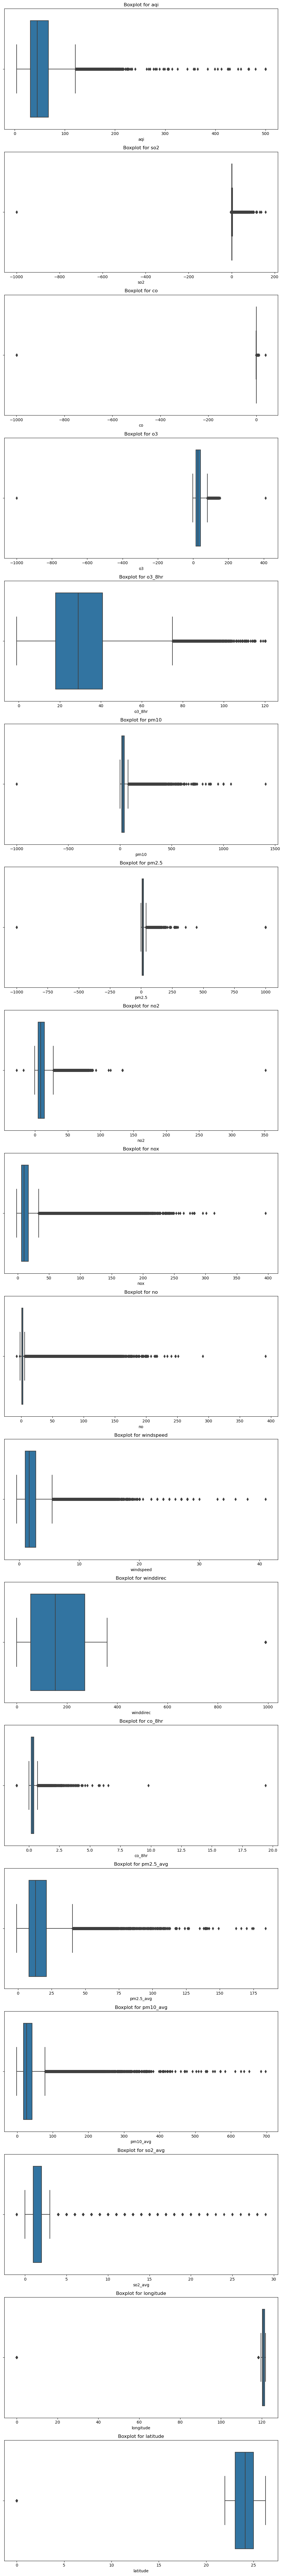

In [8]:
# 5) Outlier removal in the (numerical features).

import matplotlib.pyplot as plt
import seaborn as sns
# boxplot before outlier removal for num_features
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(10, len(numerical_columns) * 5))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
plt.tight_layout()
plt.show()

In [9]:
# Removing outliers

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each numerical column
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers based on IQR rule
df_no_outliers = df[~((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [10]:
df_no_outliers.columns

Index(['date', 'sitename', 'county', 'aqi', 'status', 'so2', 'co', 'o3',
       'o3_8hr', 'pm10', 'pm2.5', 'no2', 'nox', 'no', 'windspeed', 'winddirec',
       'co_8hr', 'pm2.5_avg', 'pm10_avg', 'so2_avg', 'longitude', 'latitude'],
      dtype='object')

In [11]:
df.columns

Index(['date', 'sitename', 'county', 'aqi', 'status', 'so2', 'co', 'o3',
       'o3_8hr', 'pm10', 'pm2.5', 'no2', 'nox', 'no', 'windspeed', 'winddirec',
       'co_8hr', 'pm2.5_avg', 'pm10_avg', 'so2_avg', 'longitude', 'latitude'],
      dtype='object')

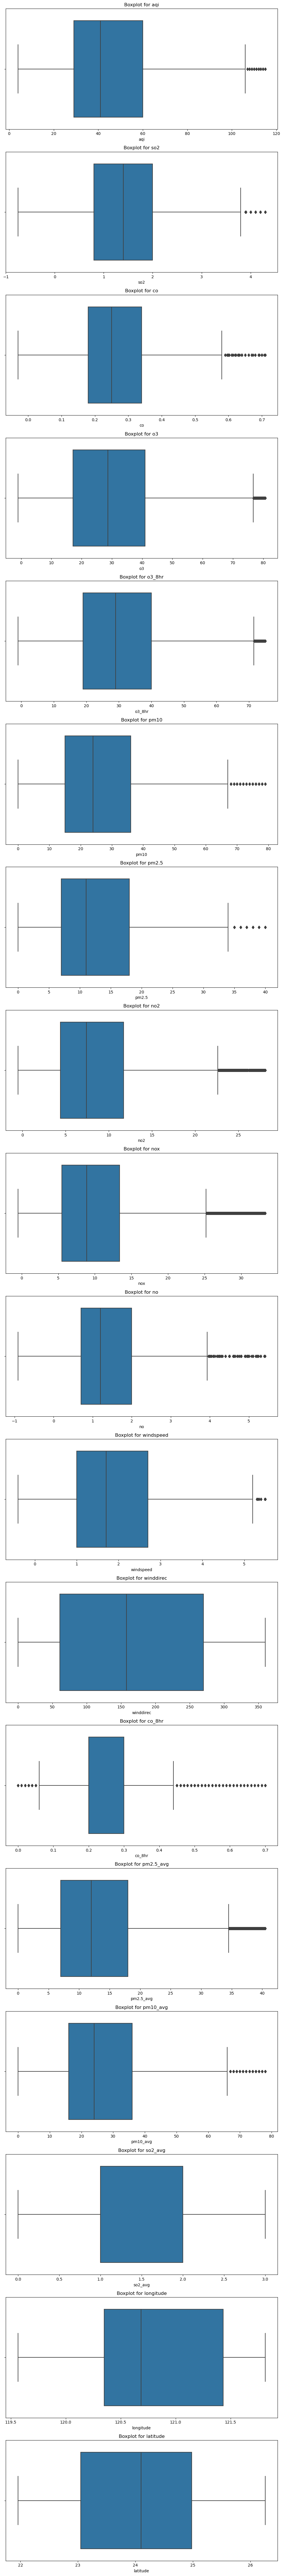

In [12]:
# boxplot after outlier removal for num_features
numerical_columns = df_no_outliers.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(10, len(numerical_columns) * 5))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    sns.boxplot(x=df_no_outliers[column])
    plt.title(f'Boxplot for {column}')
plt.tight_layout()
plt.show()

In [13]:
# 6) Cut the data year wise(2016,2017,2024)


df_no_outliers['date'] = pd.to_datetime(df_no_outliers['date'], errors='coerce')
df_no_outliers['year'] = df_no_outliers['date'].dt.year
df_filtered = df_no_outliers[~df_no_outliers['year'].isin([2016, 2017, 2024])]

C:\Users\ambal\AppData\Local\Temp\ipykernel_33252\1066689634.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['date'] = pd.to_datetime(df_no_outliers['date'], errors='coerce')
C:\Users\ambal\AppData\Local\Temp\ipykernel_33252\1066689634.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['year'] = df_no_outliers['date'].dt.year


In [14]:
df_filtered['year'].value_counts()

year
2021.0    660335
2022.0    544016
2023.0    521987
2020.0    427168
2019.0    366450
2018.0    245087
Name: count, dtype: int64

In [15]:
# 7) Date type conversion.

df_filtered['date'] = pd.to_datetime(df_filtered['date'], errors='coerce')

C:\Users\ambal\AppData\Local\Temp\ipykernel_33252\3660358978.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = pd.to_datetime(df_filtered['date'], errors='coerce')


In [16]:
# 8) Scaling numerical features
from io import StringIO
from sklearn.preprocessing import MinMaxScaler

# Select numerical features to scale
# num_col = df_filtered.dtypes(include="number").columns
numerical_features = ['so2', 'co', 'o3', 'pm10', 'pm2.5', 'no2', 'nox', 'windspeed']

#  Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical features using Min-Max scaling
df_filtered[numerical_features] = scaler.fit_transform(df_filtered[numerical_features])

C:\Users\ambal\AppData\Local\Temp\ipykernel_33252\3094601925.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[numerical_features] = scaler.fit_transform(df_filtered[numerical_features])


In [17]:
# 9) Function to validate latitude and longitude

df_filtered = df_filtered[(df_filtered['latitude'] <= 90) & (df_filtered['longitude'] <= 180)]

# Display the cleaned DataFrame
print(df_filtered)

                       date  sitename           county    aqi    status  \
496092                  NaT  Pingtung  Pingtung County   55.0  Moderate   
496095                  NaT   Taitung   Taitung County   32.0      Good   
496096                  NaT  Chaozhou  Pingtung County   60.0  Moderate   
496098                  NaT   Zuoying   Kaohsiung City   45.0      Good   
496099                  NaT   Hualien   Hualien County   33.0      Good   
...                     ...       ...              ...    ...       ...   
4996582 2018-03-26 15:00:00   Cailiao  New Taipei City   76.0  Moderate   
4996585 2018-03-26 15:00:00   Keelung     Keelung City   53.0  Moderate   
4996586 2018-03-26 15:00:00    Linkou  New Taipei City   91.0  Moderate   
4996588 2018-03-26 15:00:00    Dayuan     Taoyuan City  100.0  Moderate   
4996591 2018-03-26 15:00:00   Tucheng  New Taipei City   84.0  Moderate   

              so2        co        o3  o3_8hr      pm10  ...   no  windspeed  \
496092   0.485149  

In [34]:
import numpy as np
# 10) Data Cleaning and Derived Feature Calculation
df_filtered = df_filtered.dropna(subset=['windspeed', 'winddirec'])

#  Create wind quality index based on windspeed directly within data cleaning
df_filtered['wind_quality'] = np.select(
    [
        df_filtered['windspeed'] < 3,
        (df_filtered['windspeed'] >= 3) & (df_filtered['windspeed'] < 7),
        df_filtered['windspeed'] >= 7
    ],
    ['Calm', 'Moderate', 'Strong'],
    default='Unknown'
)
# Convert 'date' to datetime and extract month
df_filtered['date'] = pd.to_datetime(df_filtered['date'], format='%m/%d/%Y %H:%M')
df_filtered['month'] = df_filtered['date'].dt.month
print(df_filtered[['sitename', 'windspeed', 'winddirec', 'wind_quality']])

         sitename  windspeed  winddirec wind_quality
496092   Pingtung   0.263158      279.0         Calm
496095    Taitung   0.649123       25.0         Calm
496096   Chaozhou   0.263158      246.0         Calm
496098    Zuoying   0.368421        3.0         Calm
496099    Hualien   0.684211       55.0         Calm
...           ...        ...        ...          ...
4996582   Cailiao   0.701754      297.0         Calm
4996585   Keelung   0.245614      299.0         Calm
4996586    Linkou   0.684211      312.0         Calm
4996588    Dayuan   0.789474      312.0         Calm
4996591   Tucheng   0.578947      311.0         Calm

[2760289 rows x 4 columns]


Data Cleaning:
1) Removing features "unit","Pollutant","siteid".
2) Removing duplicates.
3) Handling missing values.
4) Correcting data types.
5) Outlier removal in the (numerical features).
6) Cut the data year wise(2016,2017,2024)
7) Date type conversion.
8) Scaling numerical features.
9) Validate Data Integrity(long lat verify)
10) Creating Derived features(wind condition and other features)

EDA:
1. Visualize the correlation between numerical features.
2. Visualize the distribution of the Air Quality Index (AQI).
3. Compare the distributions of pollutants based on air quality    status.
4. Plot AQI over time to identify trends.
5. Explore the relationship between PM2.5 and AQI.
6. Visualize pairwise relationships between multiple pollutants.
7. Visualize AQI levels across different counties.
8. Compare the distributions of SO2 levels for each status using a violin plot.
9. Visualize pollutant levels across geographical coordinates.
10. Determine average AQI for each season (Winter, Spring, Summer, Fall).


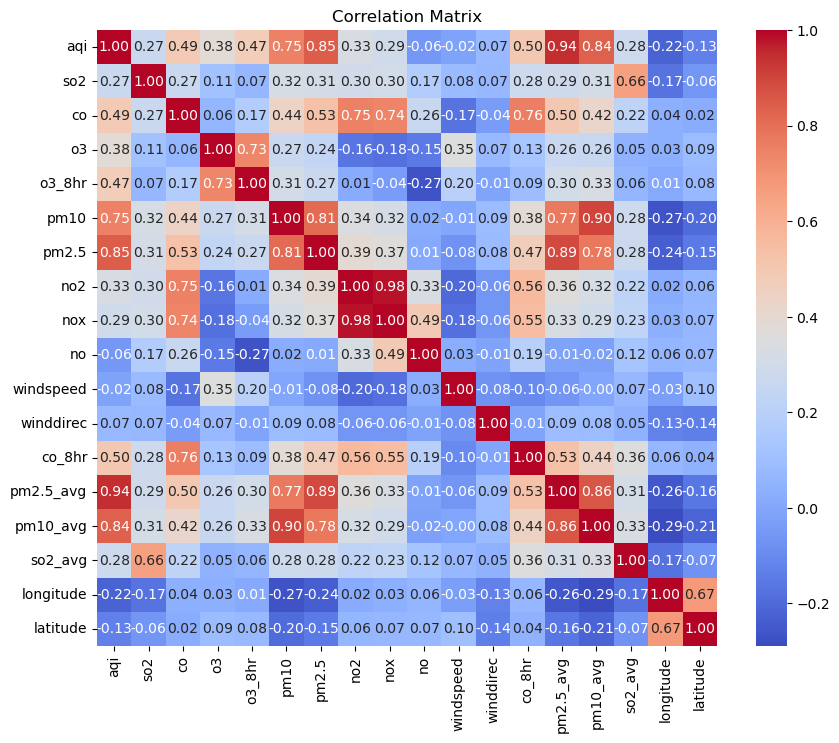

In [22]:
#1. Visualize the correlation between numerical features.
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(df_filtered[numerical_columns].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


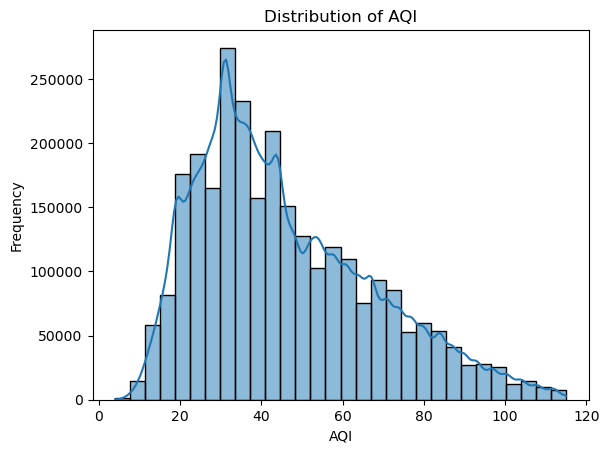

In [23]:
#2. Visualize the distribution of the Air Quality Index (AQI).
sns.histplot(df_filtered['aqi'], bins=30, kde=True)
plt.title('Distribution of AQI')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()


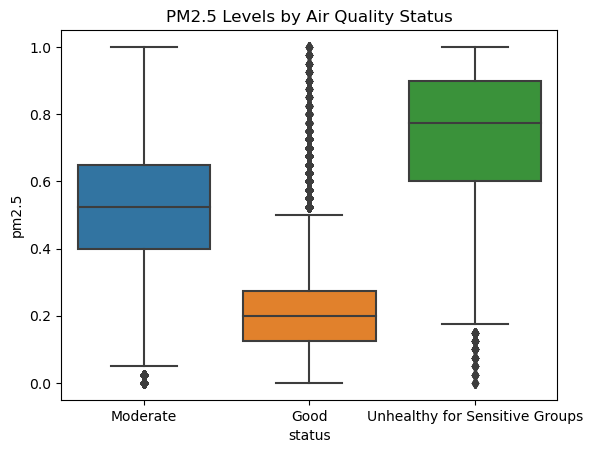

In [25]:
#3. Compare the distributions of pollutants based on air quality    status.
sns.boxplot(x='status', y='pm2.5', data=df_filtered)
plt.title('PM2.5 Levels by Air Quality Status')
plt.show()


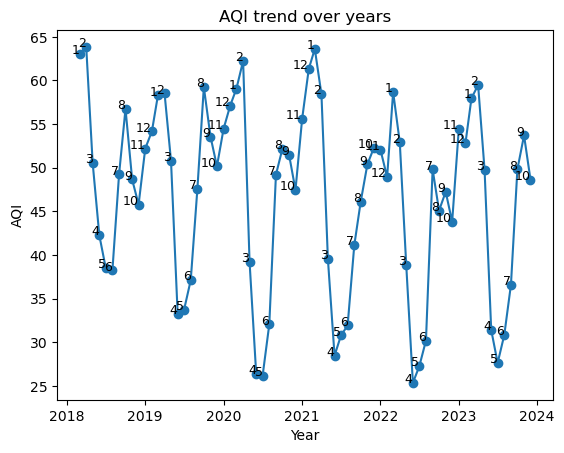

In [54]:
#4. Plot AQI over time to identify trends.
df_month = df_filtered.groupby(pd.to_datetime(df_filtered['date']).dt.to_period("M"))['aqi'].mean()
plt.plot(df_month.index.to_timestamp(),df_month,marker='o')
for i, (date, value) in enumerate(zip(df_month.index.to_timestamp(), df_month)):
    plt.text(date, value, str((i % 12) + 1), fontsize=9, ha='right')
plt.title('AQI trend over years')
plt.xlabel('Year')
plt.ylabel('AQI')
plt.show()


In [ ]:
# df_grouped = df_filtered.groupby('year')[['pm2.5', 'pm10', 'so2', 'o3']].agg(['mean', 'std', 'max', 'min'])
# df_grouped.plot(kind='line', subplots=True, layout=(4, 4), figsize=(16, 12))


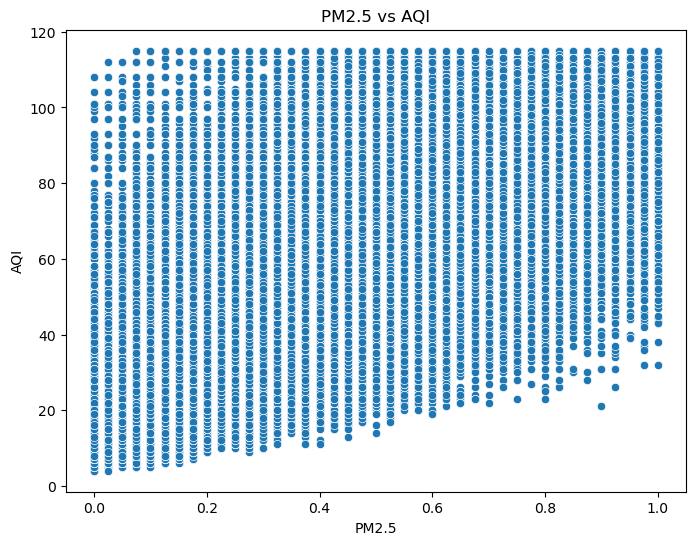

In [28]:
#5. Explore the relationship between PM2.5 and AQI.
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pm2.5', y='aqi', data=df_filtered)
plt.title('PM2.5 vs AQI')
plt.xlabel('PM2.5')
plt.ylabel('AQI')
plt.show()


c:\Users\ambal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


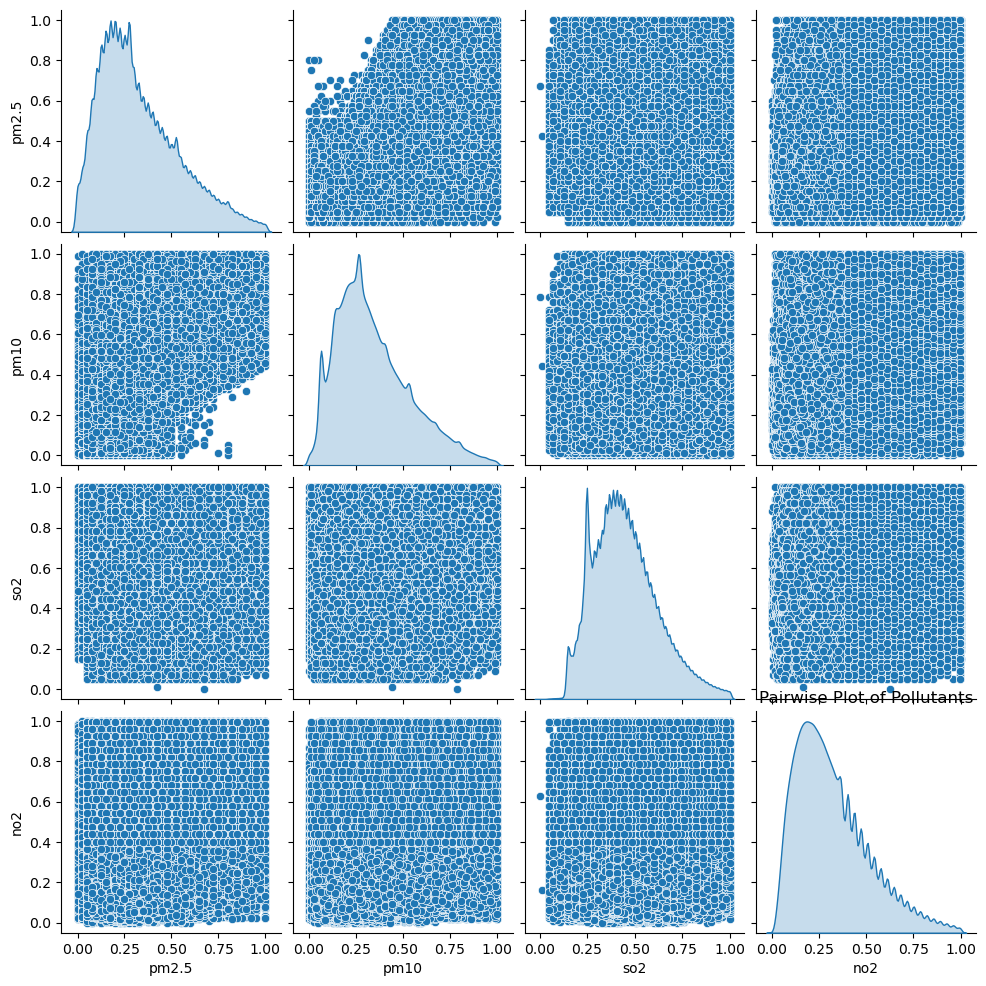

In [29]:
#6. Visualize pairwise relationships between multiple pollutants.

sns.pairplot(df_filtered[['pm2.5', 'pm10', 'so2', 'no2']], diag_kind='kde')
plt.title('Pairwise Plot of Pollutants')
plt.show()


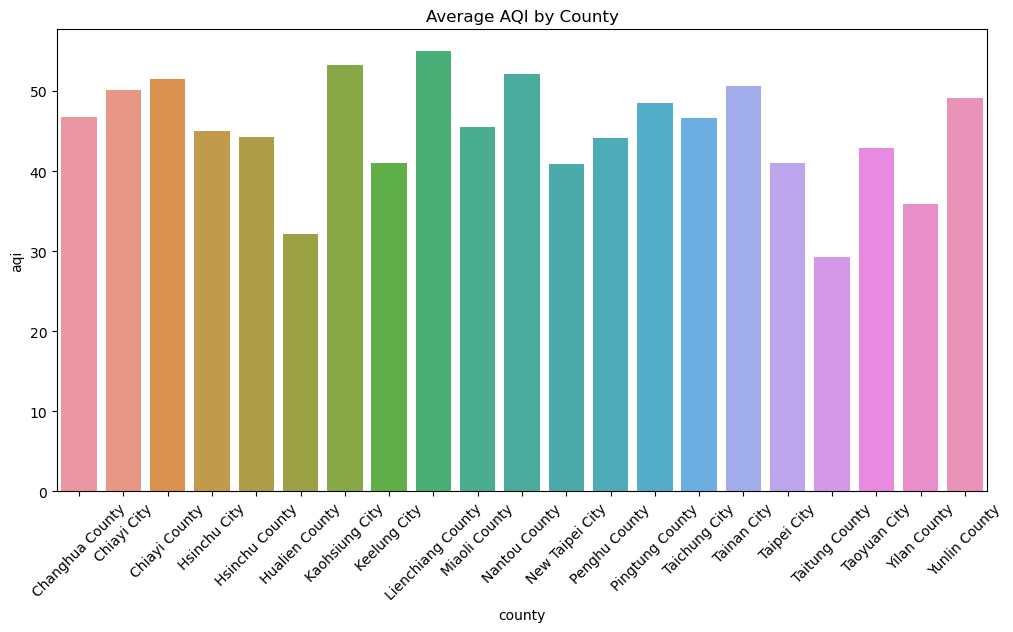

In [30]:
#7. Visualize AQI levels across different counties.
county_aqi = df_filtered.groupby('county')['aqi'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='county', y='aqi', data=county_aqi)
plt.title('Average AQI by County')
plt.xticks(rotation=45)
plt.show()


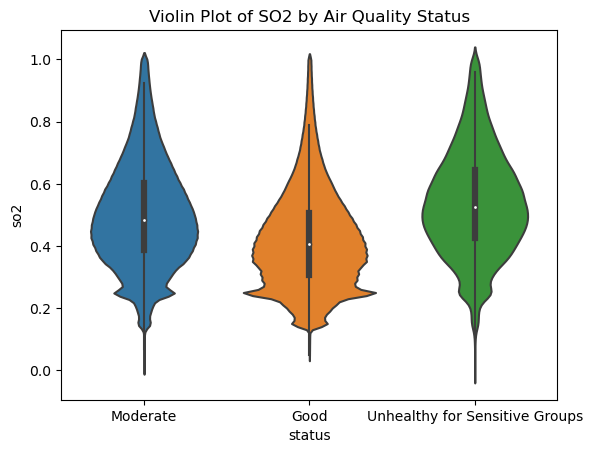

In [31]:
#8. Compare the distributions of SO2 levels for each status using a violin plot.
sns.violinplot(x='status', y='so2', data=df_filtered)
plt.title('Violin Plot of SO2 by Air Quality Status')
plt.show()

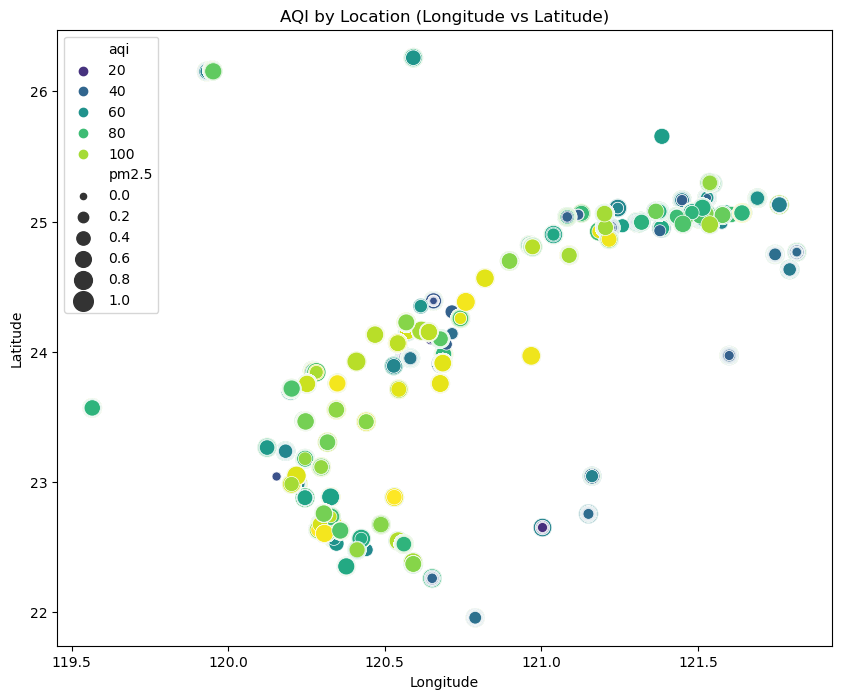

In [32]:
#9. Visualize pollutant levels across geographical coordinates.
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', hue='aqi', palette='viridis', size='pm2.5', sizes=(20, 200), data=df_filtered)
plt.title('AQI by Location (Longitude vs Latitude)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()


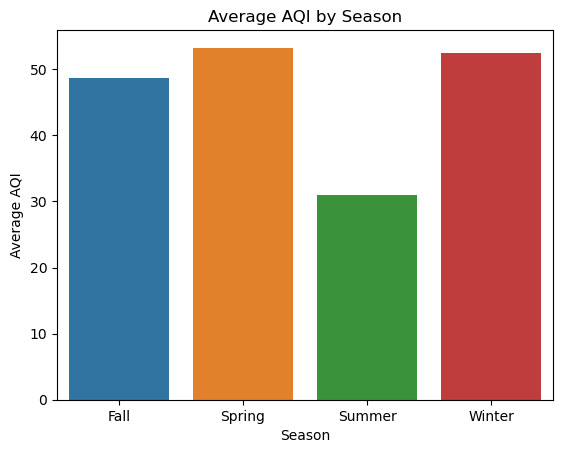

In [35]:
#10. Determine average AQI for each season (Winter, Spring, Summer, Fall).
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'
    
df_filtered['season'] = df_filtered['month'].apply(get_season)
seasonal_aqi = df_filtered.groupby('season')['aqi'].mean().reset_index()
sns.barplot(x='season', y='aqi', data=seasonal_aqi)
plt.title('Average AQI by Season')
plt.xlabel('Season')
plt.ylabel('Average AQI')
plt.show()
